# Linear regression on sklearn diabetes dataset

### Naive linear regression approach on entire dataset

In [29]:
from sklearn.datasets import load_diabetes

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [37]:
diabetes_data = load_diabetes()
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_target = diabetes_data.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [41]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df, diabetes_target, test_size=0.2, random_state=0, shuffle=False)

In [42]:
# Fit the linear regression model
reg = LinearRegression().fit(X_train, y_train)
pd.DataFrame([reg.feature_names_in_, reg.coef_], index=['feature', 'coefficient'])

,0,1,2,3,4,5,6,7,8,9
feature,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
coefficient,-8.07365,-248.849,513.855,293.675,-475.566,213.098,-33.6191,147.19,639.104,86.3394


In [43]:
# Predict on test data
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

2929.8952913182065

Using cross-validation:

In [58]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
split = kf.split(diabetes_df)
mse = []
X = diabetes_df.values
y = diabetes_target
for train, test in split:
  reg = LinearRegression().fit(X[train], y[train])
  y_pred = reg.predict(X[test])
  mse.append(mean_squared_error(y[test], y_pred))
sum(mse) / len(mse)

2993.0813104693307

### K-means clustering

In [44]:
# Scale data
scaler = StandardScaler().fit(diabetes_df.values)
scaled_df = pd.DataFrame(scaler.transform(diabetes_df.values), columns=diabetes_df.columns)
scaled_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


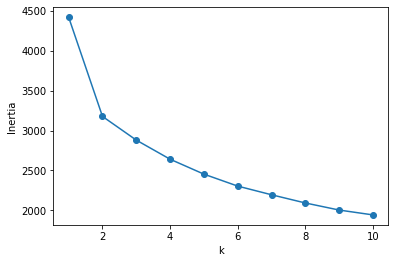

In [45]:
# Estimate value of k
inertias = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init='random', 
            n_init=10, max_iter=300, 
            tol=0.001, random_state=0)
  km.fit(scaled_df)
  inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

Looks like k=2 would be an appropriate value.

In [107]:
# Fit the model
km = KMeans(n_clusters=2, init='random', 
            n_init=10, max_iter=300, 
            tol=0.001, random_state=0)
km.fit(scaled_df)
predictions = km.predict(scaled_df)
cluster = pd.Series(predictions, index=scaled_df.index)
scaled_df['cluster'] = cluster

In [109]:
cluster

0      1
1      0
2      1
3      1
4      0
      ..
437    1
438    1
439    0
440    1
441    0
Length: 442, dtype: int32

### Clustered linear regression approach

In [122]:
def predict_by_cluster(X_train, y_train, X_test, cluster_train, cluster_test, n):
  regs = []

  X_train_cluster = pd.DataFrame(X_train)
  X_train_cluster['cluster'] = cluster_train
  y_train_cluster = pd.DataFrame(y_train)
  y_train_cluster['cluster'] = cluster_train
  X_test_cluster = pd.DataFrame(X_test)
  X_test_cluster['cluster'] = cluster_test

  for i in range(n):
    X_train_cluster_i = X_train['cluster' == i]
    y_train_cluster_i = pd.Series(y_train_cluster['cluster' == i]['target'])
    regs.append(LinearRegression().fit(X_train_cluster_i, y_train_cluster_i))

  def predict_row(row):
    return regs[row['cluster']].predict(row)

  y_pred = X_test.apply(predict_row, axis=1)
  return y_pred

In [123]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
split = kf.split(diabetes_df)
mse = []
target_df = pd.DataFrame(diabetes_target, columns=['target'])
X = diabetes_df.values
y = target_df.values
for train, test in split:
  y_pred = predict_by_cluster(X[train], y[train], X[test], cluster[train], cluster[test], 2)
  mse.append(mean_squared_error(y[test], y_pred))
sum(mse) / len(mse)



KeyError: 'target'

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
353,-0.052738,-0.044642,-0.055785,-0.036656,0.089244,-0.003193,0.008142,0.034309,0.132376,0.003064
354,-0.023677,0.050680,0.045529,0.021872,0.109883,0.088873,0.000779,0.034309,0.074191,0.061054
355,-0.074533,0.050680,-0.009439,0.014987,-0.037344,-0.021669,-0.013948,-0.002592,-0.033246,0.011349
356,-0.005515,0.050680,-0.033151,-0.015999,0.008063,0.016222,0.015505,-0.002592,-0.028323,-0.075636
357,-0.060003,0.050680,0.049840,0.018430,-0.016704,-0.030124,-0.017629,-0.002592,0.049770,-0.059067
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
